# Introducción

Existen una gran cantidad de situaciones en las que trabajaremos con una distribución que nos es normal, pero deseamos hacer uso de métodos paramétricos en lugar de métodos no paramétricos.

Existen muchas razones por las cuales nuestros datos podrían no ser gaussianos. A continuación veremos algunas de estas razones.

# Posibles razones de que los datos no sean normales

## Tamaño de la muestra

Una razón muy común por la cual nuestros datos no lucen Gaussianos es debido a que el tamaño de la muestra de datos es muy pequeña. Muchos métodos estadísticos son desarrollados para muestras con una cantidad de observaciones reducida. Sin embargo, debido al ruido en los datos, podríamos observar mostrar su función de distribución y tras verla concluir que nuestra muestra no es normal. 

En este tipo de situaciones deberíamos recolectar una mayor cantidad de observaciones. Como indica la ley de los números grandes, cuanta mayor sea la población que disponemos, mayor será la probabilidad de que nuestros datos muestren realmente la distribución subyacente.

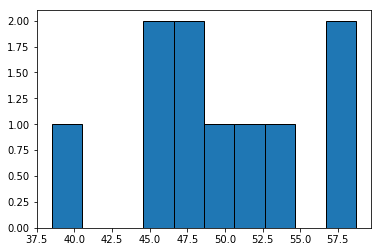

In [1]:
from numpy.random import seed
from numpy.random import randn
import matplotlib.pyplot as plt

#Fijamos la semilla
seed(1)

#Generamos la muestra
data = 5*randn(10) + 50

#Visualizamos los resultados 
plt.hist(data, ec = 'black')
plt.show()

Pese que nuestra muestra es extraída claramente de una distribución normal de media 50 y desviación estándar 5, nuestro gráfico no parece mostrar esto. Veamos que ocurre si aumentamos la muestra.

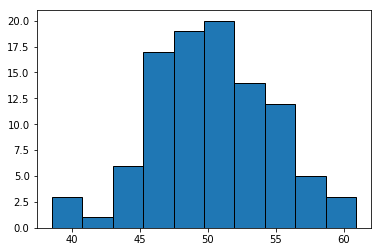

In [2]:
#Fijamos la semilla
seed(1)

#Generamos los datos
data = 5*randn(100) + 50

#Visualizamos el resultado
plt.hist(data, ec = 'black')
plt.show()

Tras aumentar el número de muestras podemos ver como nuestra distribución luce más parecido a una distribución normal.

## Resolución de los datos 

Es posible que aún coleccionando una elevada muestra de datos, nuestra distribución no sea Gaussiana, sin embargo, nuestra intuición dice lo contrario. Una razón muy común es la resolución que estamos usando para coleccionar nuestros datos.

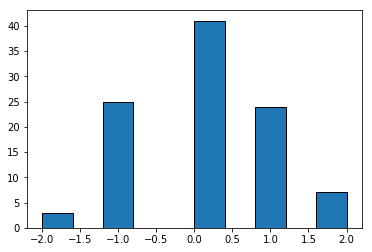

In [3]:
#Fijamos la semilla
seed(1)

#Generamos el conjunto de datos
data = randn(100)

#Redondeamos a valores enteros
data = data.round(0)

#Vemos el resultado
plt.hist(data, ec = 'black')
plt.show()

Podemos ver que al tratarse de una resolución sin números decimales nuestra muestra no luce Gaussiana pese a ser extraída de una muestra Gaussiana de media cero y desviación estándar la unidad.

## Valores Extremos

Una muestra de datos podría tener una distribución Gaussiana, pero podría estar distorsoniada por la presencia de valores extremos. Los valores extremos pueden estar presentes por múltiples razones:

* Error en la medida de los datos

* Valores perdidos

* Corrupción en los datos

* Eventos raros

En cualquier caso, los valores extremos deberían de ser identificados y eliminados con el objetivo de visualizar la distribución de nuestro conjunto de datos. Estos valores extremos son llamados muy a menudo outliers. Identificar estos valores puede requerir experiencia o la necesidad de consultar con un experto en el dominio para diseñar los criterios para identificar los valores extremos, y de esta forma eliminarlos del conjunto de datos con el que trabajaremos en un futuro.

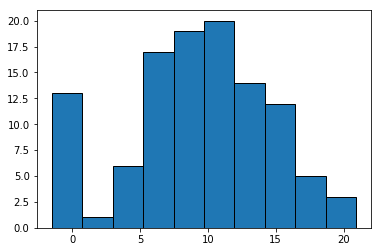

In [4]:
#Generación de una distribución Gaussiana con ruido
from numpy.random import seed
from numpy.random import randn 
from numpy import append 
import matplotlib.pyplot as plt
from numpy import zeros

#Fijamos la semilla
seed(1)

#Generamos nuestro conjunto de datos
data = 5*randn(100) + 10

#Añadimos valores extremos 
data = append(data, zeros(10))

#Graficamos la distribución
plt.hist(data, ec = 'black')
plt.show()

## Largas colas

Los valore extremos pueden manifestarse de muchas formas. Además de eventos raros en lo que se denomina ojo de la distribución, podríamos observar largas colas en una o ambas direcciones. Se podría hacer uso de un umbral, quizás basándonos en el número de desviaciones estándar, para identificar y eliminar estas largas colas.

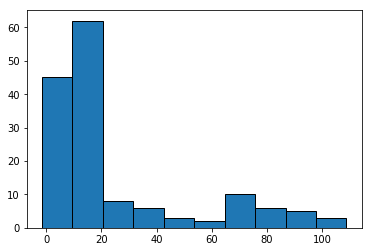

In [6]:
#Generamos una distribución con largas colas
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand

from numpy import append
from numpy import mean, std

import matplotlib.pyplot as plt

#Fijamos la semilla
seed(1)

#Generamos los datos y la cola
data = 5*randn(100) + 10
tail = 10 + (rand(50)*100)
data = append(data, tail)

#Vemos el resultado
plt.hist(data, ec = 'black')
plt.show()

In [8]:
#Calculamos la media y la desviación estándar
print("std : %.3f" % std(data))
print("mean : %.3f" % mean(data))

std : 27.280
mean : 25.195


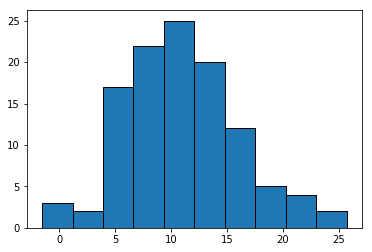

In [22]:
#Eliminamos aquellos valores que está por encima de std
data2 = [x for x in data if x < 1*std(data)]
plt.hist(data2, ec = 'black')
plt.show()

# Power Transformations

La distribución de nuestros datos podría ser normal, pero para ver esto los datos podrían requerir de algún tipo de transformación. Por ejemplo, los datos podrían presentar un elevado índice de **skew**. En algunos casos, esto puede ser corregido aplicando a nuestro conjunto de datos la transformación de la raíz cuadrada. También, la distribución podría tener una forma exponencial, pero podría lucir como normal si le aplicamos a las observaciones la transformación logaritmo natural.

Este tipo de transformaciones son conocidas como **power transformations**. El método Box-Cox se trata de un método de transformación de datos que nos permite realizar un amplio rango de este tipo de transformaciones, inlcluyendo raíz cuadrada y logaritmo natural. Este método puede ser configurado para evaluar un conjunto de transformaciones de forma automática y seleccionar aquella que mejor se adapte.

La función **boxcox()** disponible en Scipy, nos permite implementar el método Box-Cox. Esta función toma como argumento de entrada un parámetro denominado **lambda**, que controla el tipo de transformación a realizar. Alguno de los valores más comúnes de **lambda** son:

* **lambda = -1 : ** transformación recíproca.

* **lambda = -0.5 : ** transformación recíproca raíz cuadrada.

* **lambda = 0.0 : ** transformación logarítmica.

* **lambda = 0.5 : ** transformación raíz cuadrada.

* **lambda = 1.0 : ** ningún tipo de transformación.

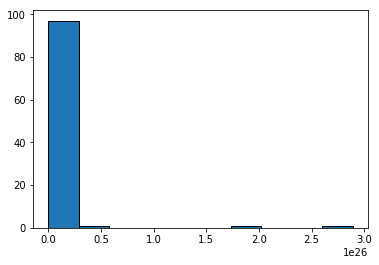

In [2]:
# Generamos un conjunto de datos de tipo exponencial
from numpy.random import seed
from numpy.random import randn
from numpy import exp

from scipy.stats import boxcox

import matplotlib.pyplot as plt

#Generamos la semilla
seed(1)

#Generamos el conjunto de datos
data = 5*randn(100) + 50
#Aplicamos la transformación Gaussiana
data = exp(data)

#Vemos el resultado
plt.hist(data, ec = 'black')
plt.show()

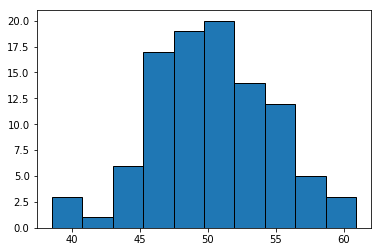

In [3]:
#Aplicamos el método Box-Cox con la transformación logarítmica
data = boxcox(data, 0)

#Vemos el resultado 
plt.hist(data, ec = 'black')
plt.show()